In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
!ls ../build

CMakeCache.txt	     init_vis.mac  rdecay02_h1_H10.csv	rdecay02_h1_H15.csv
CMakeFiles	     main	   rdecay02_h1_H11.csv	rdecay02_h1_H16.csv
cmake_install.cmake  Makefile	   rdecay02_h1_H12.csv	rdecay02.mac
debug.mac	     output.log    rdecay02_h1_H13.csv	vis.mac
G4History.macro      plotHisto.C   rdecay02_h1_H14.csv


In [3]:

#!cat "../build/rdecay02_h1_H10.csv"

In [79]:
# The Pulse Height Spectrum (PHS) of the target
decay_histo0 = pd.read_csv("../build/rdecay02_h1_H10.csv", header=6);

# The PHS of the detector
decay_histo1 = pd.read_csv("../build/rdecay02_h1_H11.csv", header=6);

# The combined PHS of the target and detector
decay_histo2 = pd.read_csv("../build/rdecay02_h1_H12.csv", header=6);

# The anti-coincidece PHS of the target
decay_histo3 = pd.read_csv("../build/rdecay02_h1_H13.csv", header=6);

# The anti-coincidece PHS of the detector
decay_histo4 = pd.read_csv("../build/rdecay02_h1_H14.csv", header=6);

# The coincidece PHS between the target and detector
decay_histo5 = pd.read_csv("../build/rdecay02_h1_H15.csv", header=6);

# The emitted particle energy spectrum
decay_histo6 = pd.read_csv("../build/rdecay02_h1_H16.csv", header=6);

decay_histo6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 5 columns):
entries    502 non-null int64
Sw         502 non-null int64
Sw2        502 non-null int64
Sxw0       502 non-null float64
Sx2w0      502 non-null float64
dtypes: float64(2), int64(3)
memory usage: 19.7 KB


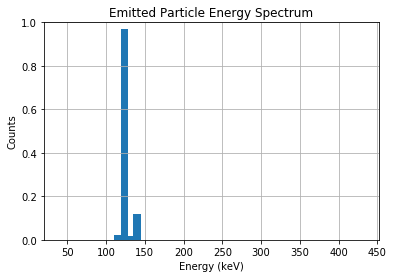

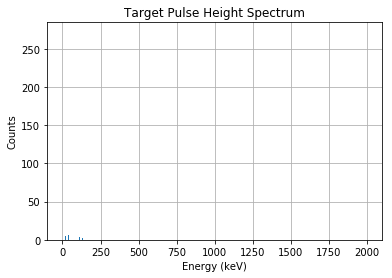

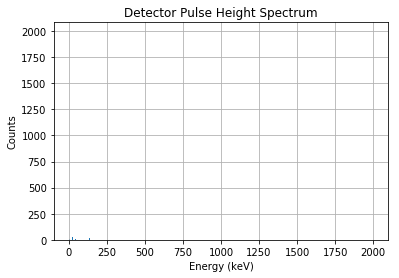

In [94]:

x = np.linspace(0, 2000, len(decay_histo6["Sw"]));

fig = plt.figure();

ignoreBefore = 20
ignorePast   = 50

#normalizedHisto6 = decay_histo6["Sw"][0:-ignorePast];
normalizedHisto6 = np.divide(decay_histo6["Sw"][ignoreBefore:-ignorePast], 
                            np.max(decay_histo6["Sw"][ignoreBefore:-ignorePast]));

plt.bar(x[ignoreBefore:-ignorePast], normalizedHisto6, width=10);
plt.xlabel("Energy (keV)");
plt.ylabel("Counts");
plt.title("Emitted Particle Energy Spectrum");
plt.grid();
plt.ylim([0, 1])
plt.xlim([ignoreBefore, len(decay_histo6["Sw"])-ignorePast])

fig = plt.figure();
plt.bar(x, decay_histo0["Sw"]);
plt.xlabel("Energy (keV)");
plt.ylabel("Counts");
plt.title("Target Pulse Height Spectrum");
plt.grid();


fig = plt.figure();
plt.bar(x, decay_histo1["Sw"]);
plt.xlabel("Energy (keV)");
plt.ylabel("Counts");
plt.title("Detector Pulse Height Spectrum");
plt.grid();

